# Cythosim example
Requires Python>=3.7  


### Compiling cythosim
Here we compile cythosim and move it to the burrent folder.

Skip this step if you have already compiled cythosim

In [1]:
%%bash
make -j4 cythosim > compile_log.txt

makefile.inc:242: Using BLAS library in /usr/lib/x86_64-linux-gnu/
In file included from src/cpython/python_frame.h:19,
                 from src/tools/cythosim.h:15,
                 from src/tools/cythosim.cc:54:
src/cpython/python_utilities.h: In function ‘pybind11::dict& map_to_dict(const map_type&)’:
src/cpython/python_utilities.h:81:22: warning: structured bindings only available with -std=c++17 or -std=gnu++17
     for (const auto &[name, rec] : mappe) {
                      ^
In file included from src/tools/cythosim.h:15,
                 from src/tools/cythosim.cc:54:
src/cpython/python_frame.h: At global scope:
src/cpython/python_frame.h:42:7: warning: ‘Frame’ declared with greater visibility than the type of its field ‘Frame::objects’ [-Wattributes]
 class Frame
       ^~~~~
src/cpython/python_frame.h: In function ‘void distribute_objects(Simul*, Frame*, ObjMap<Obj, Prp>, Set&, std::__cxx11::string)’:
src/cpython/python_frame.h:89:26: warning: structured bindings only avail

In [2]:
%%bash
cp bin/cytosim*.so .

In [3]:
import cytosim
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def plot_fibers(fibers):
    plt.figure()
    for f in fibers:
        p = f.points()
        plt.plot(p[:,0],p[:,1])
    plt.axis('equal')
    plt.show()

# Aster simulation
Here we simulate an aster with 32 microtubules of fixed size, larger than the cell radius.

In [5]:
sim = cytosim.start("cym/aster.cym")

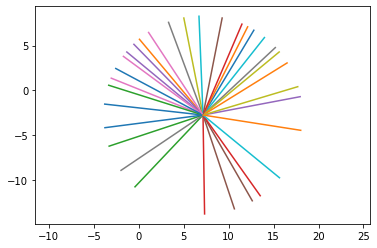

In [6]:
plot_fibers(sim.fibers)

### Saving the simulation
After, files "objects.cmo" and "properties.cmo" should be in the current folder

In [7]:
sim.save()

In [8]:
import os
cmo_files = [f for f in os.listdir() if f.endswith(".cmo")]
print(cmo_files)

['objects.cmo', 'properties.cmo', 'messages.cmo']


### Running the simulations
Here we run 5 times 8 simulations stems, and we record each time after 8 simulations steps.

In [9]:
for n in range(5):
    sim.run(8)
    sim.save()

### Opening a saved simulation

<Figure size 432x288 with 0 Axes>

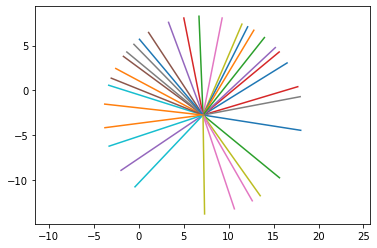

<Figure size 432x288 with 0 Axes>

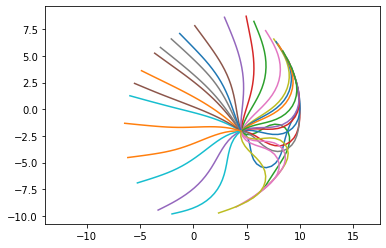

<Figure size 432x288 with 0 Axes>

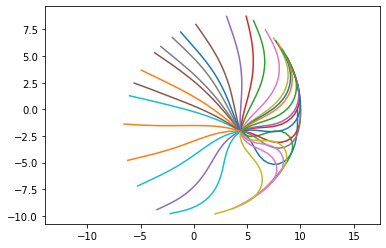

<Figure size 432x288 with 0 Axes>

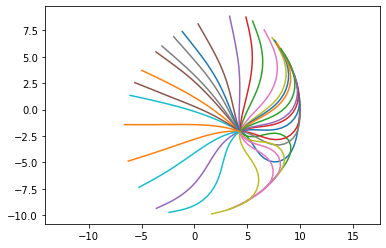

<Figure size 432x288 with 0 Axes>

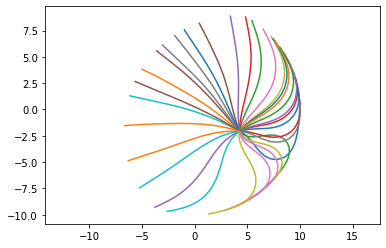

In [10]:
sim = cytosim.open()
for i in range(5):
    if sim.next():
        plt.figure()
        plot_fibers(sim.fibers)
        plt.show()